In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
movies = pd.read_csv('movie_metadata.csv')
movies.head()
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [74]:
movies.dropna(how = 'any')
#movies.drop(columns= 'color',inplace=True)
movies.drop_duplicates(inplace=True)


In [75]:
movies.info()
pd.DatetimeIndex(movies['title_year'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 27 columns):
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-null object
num_user_for_reviews         4977 non-

DatetimeIndex(['1970-01-01 00:00:00.000002009',
               '1970-01-01 00:00:00.000002007',
               '1970-01-01 00:00:00.000002015',
               '1970-01-01 00:00:00.000002012',
                                         'NaT',
               '1970-01-01 00:00:00.000002012',
               '1970-01-01 00:00:00.000002007',
               '1970-01-01 00:00:00.000002010',
               '1970-01-01 00:00:00.000002015',
               '1970-01-01 00:00:00.000002009',
               ...
               '1970-01-01 00:00:00.000002004',
               '1970-01-01 00:00:00.000002005',
               '1970-01-01 00:00:00.000001992',
               '1970-01-01 00:00:00.000002005',
               '1970-01-01 00:00:00.000002011',
               '1970-01-01 00:00:00.000002013',
                                         'NaT',
               '1970-01-01 00:00:00.000002013',
               '1970-01-01 00:00:00.000002012',
               '1970-01-01 00:00:00.000002004'],
              dtype=

In [76]:
#finding median budget per year
median_budget = movies.groupby('title_year')['budget'].median()/1e6

In [80]:
median_budget.tail()

title_year
2012.0    17.0
2013.0    20.0
2014.0    15.0
2015.0    15.0
2016.0    25.0
Name: budget, dtype: float64

In [90]:
median_rolling = median_budget.rolling(5).mean()
median_rolling

title_year
1916.0          NaN
1920.0          NaN
1925.0          NaN
1927.0          NaN
1929.0     1.421981
1930.0     2.134800
1932.0     2.274800
1933.0     2.289700
1934.0     1.154700
1935.0     1.200700
1936.0     0.680700
1937.0     0.920700
1938.0     1.221274
1939.0     1.716274
1940.0     1.983874
1941.0     1.963874
1942.0     1.753874
1943.0     1.914800
1944.0     1.827000
1945.0     1.776875
1946.0     2.162875
1947.0     2.432875
1948.0     2.577475
1949.0     2.365275
1950.0     2.779757
1951.0     2.602843
1952.0     2.651003
1953.0     2.271003
1954.0     3.011003
1955.0     2.497246
            ...    
1987.0    12.180000
1988.0    12.280000
1989.0    13.180000
1990.0    15.880000
1991.0    17.000000
1992.0    19.400000
1993.0    20.100000
1994.0    22.100000
1995.0    22.600000
1996.0    23.800000
1997.0    24.800000
1998.0    26.800000
1999.0    26.200000
2000.0    25.400000
2001.0    25.800000
2002.0    23.900000
2003.0    23.800000
2004.0    24.400000
2005.0   

In [103]:
#converting years into array for plotting
years = median_budget.index.values
#converting budget values into array for plotting
med_budget = median_budget.values
med_budget_roll = median_rolling.values


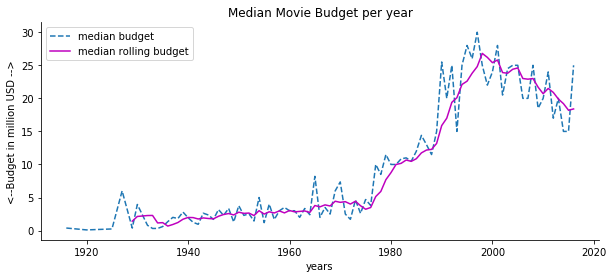

In [180]:
fig,ax1 = plt.subplots(nrows = 1,ncols=1,figsize = (10,4))
ax1.plot(years,med_budget,'--',label = 'median budget')
ax1.plot(years,median_rolling,'-m',label = 'median rolling budget')
ax1.set_title('Median Movie Budget per year')
ax1.set_ylabel('<--Budget in million USD -->')
ax1.set_xlabel('years')
#reoving spines to reduce clutter
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()
